<p style="text-align:center">
    <a href="https://rofer.org/">
    <img src="https://rofer.org/wp-content/uploads/2022/09/analytics.png" width="200" alt="Machine Learning Mobile Price Prediction"  />
    </a>
</p>

# <font color="blue"><center>www.rofer.org</center>
## <font color="blue"><center>DIGITAL & DATA ENTHUSIAST</center></font>

#  Use KNN (K Nearest Neighbors) Classification model to predit the right kind of membership type for each customer

Suitable for finance, banking and retailers who wants to customer loyalty and retention by offering the right type of membership based on existing data

## Project Context

A popular health, beauty and fitness shopping app, had been riding high. Their initial service model, with basic features and in-app purchases for premium content, had attracted a large user base. But lately, a troubling trend emerged - retention rates were dropping. Users were signing up, trying the app, then disappearing.

Offering a <b>membership type</b> seems like the solution. Now they have to look at their current data and see how to use it to personalize recommendations for Membership types that fits to their customer requirments to enjoy personalized discounts, promotions and content.
    
The Experiment
    
Pilot a outbound marketing offer to existing users offering personalized recommendation for membership type based on their total spending, items purchase, discount applied, satisfaction level, age, gender and city. A smaller user group was randomly assigned one of the models. 

My work process flow
    
*   Use KNN (K Nearest Neighbors) Classification model to predit the right kind of membership type for each customer
*   Perform data cleansing and EDA. <a href="https://www.kaggle.com/datasets/uom190346a/e-commerce-customer-behavior-dataset">Data source is from Kaggle</a> which is already processed and cleansed
*   Target variable is the Membership Type features
*   Identifying independent variables that is strongly correlated with our target variable
*   Perform independent variable engineering when necessary
*   Built a model using SKlearn
*   Perform Train/Test split to build the model
*   Perform Train/Test evaluation approach
*   For other <a href="https://rofer.org/">data related Data Analysis please check rofer.org</a>



## Loading the downloaded dataset

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_colwidth", 100)
df = pd.read_csv("EcommerceCustomerBehavior.csv")
df.shape

(350, 11)

In [2]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [3]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [4]:
df.dtypes

Customer ID                   int64
Gender                       object
Age                           int64
City                         object
Membership Type              object
Total Spend                 float64
Items Purchased               int64
Average Rating              float64
Discount Applied               bool
Days Since Last Purchase      int64
Satisfaction Level           object
dtype: object

## Dataframe is already in good condition to perform EDA. Assigning it to another DF and start EDA

In [5]:
df_CB = df

# Exploratory Data Analysis

In [6]:
df_CB.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

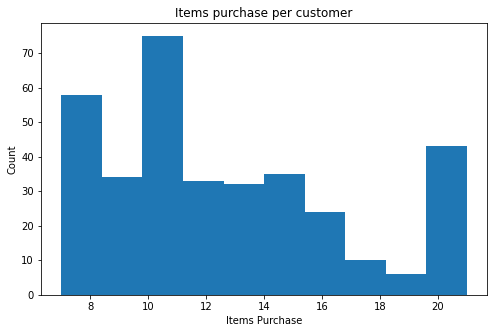

In [8]:
df_CB['Items Purchased'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Items purchase per customer')
# add y-label
plt.ylabel('Count')
# add x-label
plt.xlabel('Items Purchase')

plt.show()

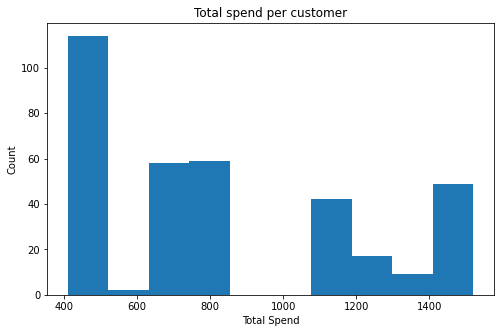

In [9]:
df_CB['Total Spend'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Total spend per customer')
# add y-label
plt.ylabel('Count')
# add x-label
plt.xlabel('Total Spend')

plt.show()

## Takeaways

Most of the customers spend less than USD 500. Interestingly there are also group of customers who are median spenders and another group of customers who spent more than USD 1,000. We can already see that these group of customers can be split into three groups. Low spender, medium spender and high spenders.

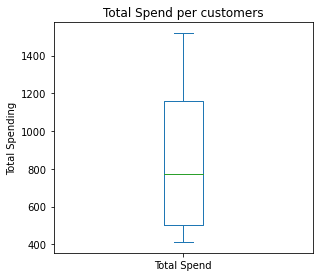

In [10]:
df_CB_spend = df_CB["Total Spend"]

df_CB_spend.plot(kind='box')

plt.title('Total Spend per customers')
plt.ylabel('Total Spending')

##plt.show()
plt.subplots_adjust(left=0.2, right=0.8, bottom=0.1, top=0.9)

## Takeaways

Box plot shows that there is a spread in how much customers spend. The median customer spends around $1000. There are some customers who spend much more (outliers above the whiskers) and some who spend much less (outliers below the whiskers).

In [11]:
df_CB.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

Selecting the features we will use to build the model and understanding their relationships

In [12]:
df_CB_features = df_CB[["Age",
                        "Total Spend",
                        "Items Purchased",
                        "Average Rating",
                        "Days Since Last Purchase"]]

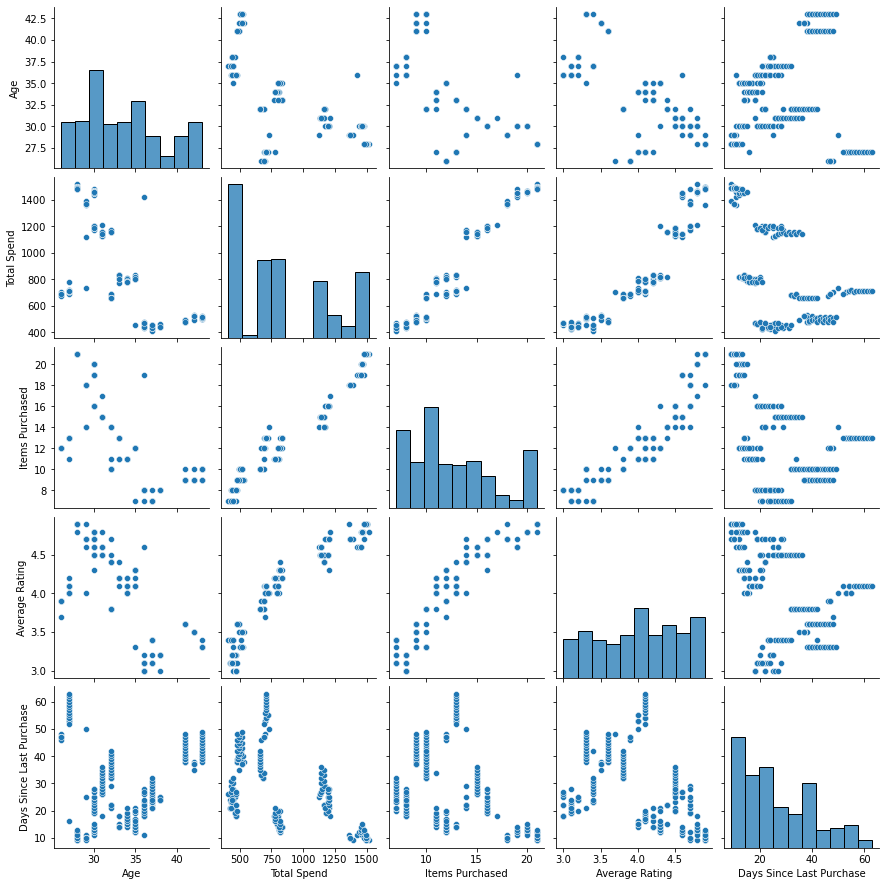

In [13]:
sns.pairplot(data=df_CB_features)

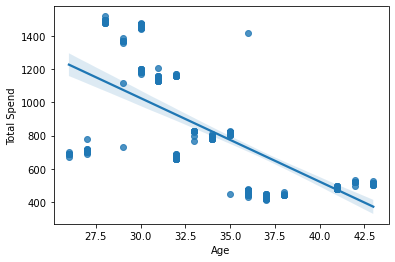

In [14]:
sns.regplot(x="Age", y="Total Spend", data=df_CB_features)
plt.show()

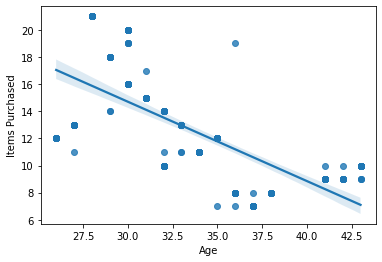

In [15]:
sns.regplot(x="Age", y="Items Purchased", data=df_CB_features)
plt.show()

## Takeaways

Each dot in the scatter plot represents a single person. The position of the dot on the graph indicates the person's age and how many items they purchased. For example, a dot in the upper right corner of the graph would represent someone who is older and who purchased more than than age group between 35-40.

There is no clear linear relationship between age and the number of items purchased. This means that older people aren't necessarily buying more items than younger people, or vice versa. Since there is no significant indication of linear relationship, we have to use more features to build the model and <font color="red">"not just offering membership type based on age to increase in-app purchase"</font>

In [16]:
df_CB.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


Converting Membershipt Type and Satisfaction Level into numerical categorical types

In [17]:
df_CB["Membership Type"].unique()

array(['Gold', 'Silver', 'Bronze'], dtype=object)

In [18]:
df_CB["Satisfaction Level"].unique()

array(['Satisfied', 'Neutral', 'Unsatisfied', nan], dtype=object)

Predict customers based on Membership Type

In [19]:
##convert Membership Type and Satisfaction Level into categorical columns

df_CB["Membership_Type2"] = df_CB["Membership Type"].astype("category")
df_CB["SatisfactionLevel2"] = df_CB["Satisfaction Level"].astype("category")

df_CB["Membership_Type2"] = df_CB["Membership_Type2"].cat.codes
df_CB["SatisfactionLevel2"] = df_CB["SatisfactionLevel2"].cat.codes

df_CB.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Membership_Type2,SatisfactionLevel2
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,1,1
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,2,0
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,0,2
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,1,1
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,2,2


In [20]:
df_CB[df.Membership_Type2==0].head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Membership_Type2,SatisfactionLevel2
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,0,2
5,106,Female,37,Houston,Bronze,440.80,8,3.1,False,22,Neutral,0,0
8,109,Female,41,Chicago,Bronze,495.25,10,3.6,True,40,Unsatisfied,0,2
11,112,Female,36,Houston,Bronze,470.50,7,3.2,False,20,Neutral,0,0
14,115,Female,42,Chicago,Bronze,530.40,9,3.5,True,38,Unsatisfied,0,2


In [21]:
df_CB[df.Membership_Type2==1].head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Membership_Type2,SatisfactionLevel2
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,Satisfied,1,1
3,104,Male,30,San Francisco,Gold,1480.3,19,4.7,False,12,Satisfied,1,1
6,107,Female,31,New York,Gold,1150.6,15,4.5,True,28,Satisfied,1,1
9,110,Male,28,San Francisco,Gold,1520.1,21,4.8,False,9,Satisfied,1,1
12,113,Female,30,New York,Gold,1200.8,16,4.3,True,21,Satisfied,1,1


In [22]:
df_CB[df.Membership_Type2==2].head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Membership_Type2,SatisfactionLevel2
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,2,0
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,2,2
7,108,Male,35,Los Angeles,Silver,800.90,12,4.2,False,14,Neutral,2,0
10,111,Male,32,Miami,Silver,690.30,11,3.8,True,34,Unsatisfied,2,2
13,114,Male,33,Los Angeles,Silver,820.75,13,4.4,False,15,Satisfied,2,1


## We will be using multiple data features such as Age, Total Spend, Items Purchase, Average Rating, average rating to predict the right membership type.

In [48]:
from sklearn import preprocessing
%matplotlib inline

In [24]:
##choose features that will be included in the train model
df_CB_features1 = df_CB[["Age",
           "Total Spend",
           "Items Purchased",
           "Average Rating",
            "Days Since Last Purchase",
            "SatisfactionLevel2",
            "Membership_Type2"]]

In [25]:
df_CB_features1.head()

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,SatisfactionLevel2,Membership_Type2
0,29,1120.20,14,4.6,25,1,1
1,34,780.50,11,4.1,18,0,2
2,43,510.75,9,3.4,42,2,0
3,30,1480.30,19,4.7,12,1,1
4,27,720.40,13,4.0,55,2,2


In [26]:
X = df_CB_features1[['Age', 'Total Spend','Items Purchased', 'Average Rating']] 

In [27]:
X2 = df_CB_features1[['Age', 'Total Spend','Items Purchased', 'Average Rating']] 

In [28]:
##What are our labels for predcitions

y = df_CB_features1['Membership_Type2'].values
y[0:5]

array([1, 2, 0, 1, 2], dtype=int8)

# Start of our Machine Learning development

*   Let's split the dataset as 80% for training and 20% for testing
*   We will use the 80% to train our model 
*   We will use the 20% to test and evaluate our model 

<center>
    <img src="https://rofer.org/wp-content/uploads/2020/10/pexels-kaboompics-com-6224.jpg" width="500" alt="Machine Learning Mobile Price Prediction"  />
</center>

# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (280, 4) (280,)
Test set: (70, 4) (70,)


In [54]:
len(X_train)

280

In [60]:
len(X_test)

70

In [56]:
len(y_train)

280

In [57]:
len(y_test)

70

# Classification
## K nearest neighbor (KNN)

Classifier implementing the k-nearest neighbors vote.

In [30]:
##import KNN library
from sklearn.neighbors import KNeighborsClassifier

k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

# Predicting

In [31]:
yhat = neigh.predict(X_test)
yhat[0:70]

array([1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 0, 1, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 0, 1, 1, 0, 2, 1, 0, 1,
       2, 1, 2, 2], dtype=int8)

In [32]:
X_test["prediction"] = yhat

In [33]:
X_test["original"] = y_test

In [63]:
neigh.score(X_train, y_train)

1.0

In [65]:
X_test

,Age,Total Spend,Items Purchased,Average Rating,prediction,original
63,29,1370.20,18,4.7,1,1
34,26,690.60,12,3.9,2,2
204,27,780.90,11,4.2,2,2
330,35,820.90,12,4.3,2,2
128,43,500.75,10,3.3,0,0
...,...,...,...,...,...,...
93,29,1370.20,18,4.7,1,1
261,32,660.30,10,3.8,2,2
33,29,1370.20,18,4.7,1,1
139,34,790.20,11,4.0,2,2


# Plot Confusion Matrix to evaluate Model accuracy

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yhat)
cm

array([[18,  0,  0],
       [ 0, 23,  0],
       [ 0,  0, 29]])

Text(42.0, 0.5, 'Truth')

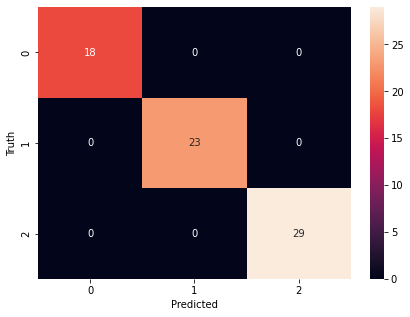

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Summary:
    
## A model shows perfect accuracy where prediction is equavalent to the original membership type of the test dataset

We can now use this model to provide personalized recommendation to offer the right membership type to each new customer based on their Age, 
Total Spend, Item Purchase and Average Rating

0 = Bronze membership type<br>
1 = Silver membership type<br>
2 = Gold membership type<br>